In [98]:
import numpy as np
from matplotlib import pyplot as plt

In [99]:
# components_time = np.load("Experiments/components_time.npy")
# comp_t_log = np.load("Experiments/comp_t_log.npy")
# lpv_counter = np.load("Experiments/lpv_counter.npy")

# components_time = np.load("Experiments/components_time_noise.npy")
# comp_t_log = np.load("Experiments/comp_t_log_noise.npy")
# lpv_counter = np.load("Experiments/lpv_counter_noise.npy")

components_time = np.load("Experiments/components_time_long.npy")
comp_t_log = np.load("Experiments/comp_t_log_long.npy")
lpv_counter = np.load("Experiments/lpv_counter_long.npy")

# components_time = np.load("Experiments/components_time_tight.npy")
# comp_t_log = np.load("Experiments/comp_t_log_tight.npy")
# lpv_counter = np.load("Experiments/lpv_counter_tight.npy")

Nsim = 450
max_iterations = 4
dt = 0.1

In [100]:
np.unique(lpv_counter, return_counts=True)

(array([1, 2, 3]), array([313, 135,   2], dtype=int64))

In [101]:
CT_iters = np.split(components_time, Nsim, axis=1)
CT = np.sum(CT_iters[0], axis=1)

In [102]:
S_iter = np.zeros(Nsim)
T_iter = np.zeros(Nsim)

for i in range(Nsim):
    CT = np.sum(CT_iters[i], axis=1)
    S_iter[i] = CT[1]
    T_iter[i] = np.sum(CT)

In [103]:
Sorted = np.sort(T_iter)
np.max(T_iter)*1000, np.mean(Sorted[int(Nsim*0.95):])*1000, np.mean(T_iter)*1000, np.std(T_iter)*1000, np.mean(S_iter)*1000 #in ms

(65.0033950805664,
 36.15717265916908,
 14.119722578260633,
 7.074036116225069,
 4.794397354125977)

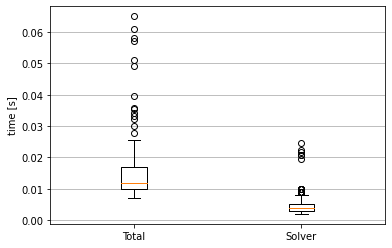

In [96]:
plt.boxplot([T_iter, S_iter])
plt.xticks([1, 2],  ['Total', 'Solver'])
plt.grid(axis='y')
plt.ylabel("time [s]");

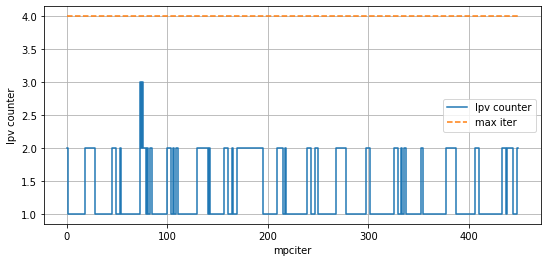

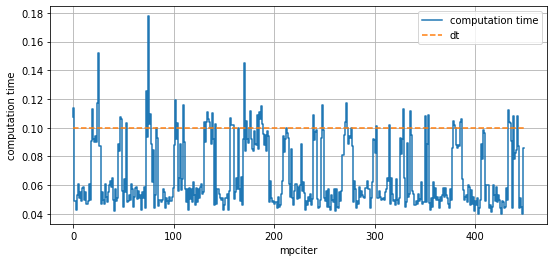

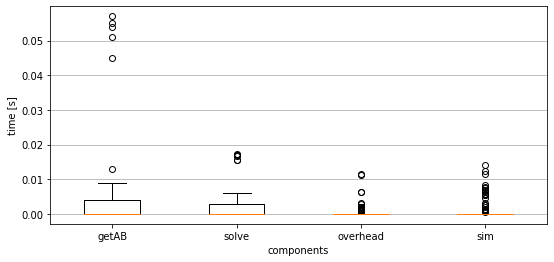

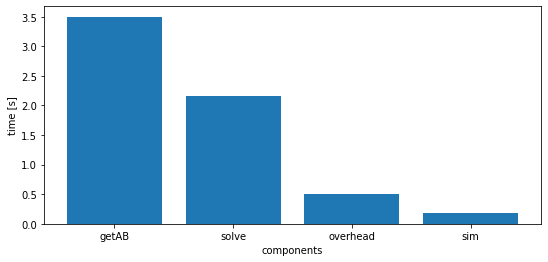

In [97]:
fig4 = plt.figure(figsize=[8.9, 4.0])
#plt.subplot(2,1,1)
plt.step(np.arange(Nsim), lpv_counter, label='lpv counter')
plt.plot(np.arange(Nsim), np.ones(Nsim)*max_iterations, '--', label='max iter')
plt.ylabel("lpv counter")
plt.xlabel("mpciter")
plt.grid()
plt.legend();
# plt.show()

fig4 = plt.figure(figsize=[8.9, 4.0])
#plt.subplot(2,1,2)
plt.step(np.arange(Nsim), comp_t_log, label='computation time')
plt.plot(np.arange(Nsim), np.ones(Nsim)*dt, '--', label='dt')
plt.ylabel("computation time")
plt.xlabel("mpciter")
plt.grid()
plt.legend()
# plt.show()

fig2 = plt.figure(figsize=[8.9, 4.0])#['getAB', 'solve', 'overhead', 'sim']
data1 = np.trim_zeros(components_time[0,:])
data2 = np.trim_zeros(components_time[1,:])
data3 = np.trim_zeros(components_time[2,:])
data4 = np.trim_zeros(components_time[3,:])
data = [data1, data2, data3, data4]
plt.boxplot(data)
plt.xticks([1, 2, 3, 4],  ['getAB', 'solve', 'overhead', 'sim'])
plt.grid(axis='y')
plt.ylabel("time [s]")
plt.xlabel("components")
# plt.show()

fig3 = plt.figure(figsize=[8.9, 4.0])#['getAB', 'solve', 'overhead', 'sim']
plt.bar(['getAB', 'solve', 'overhead', 'sim'], np.sum(components_time, axis=1))
plt.ylabel("time [s]")
plt.xlabel("components")
plt.show()

In [96]:
log_q = np.load("Experiments/log_q.npy")
log_w = np.load("Experiments/log_w.npy")

In [102]:
np.hstack((0,log_q[0,:]))

array([ 0.00000000e+00,  3.35843458e-01,  6.72237190e-01,  6.52204141e-01,
        5.90337136e-01,  5.85165576e-01,  5.95609225e-01,  5.99192933e-01,
        5.97673593e-01,  5.96378525e-01,  5.96548028e-01,  5.96876890e-01,
        5.96904255e-01,  5.96835336e-01,  5.96813226e-01,  5.96825403e-01,
        5.96833078e-01,  5.96831702e-01,  5.96829665e-01,  5.96829571e-01,
        5.96830023e-01,  5.96683871e-01,  5.97062295e-01,  5.97988705e-01,
        5.95896261e-01,  5.89515821e-01,  5.97087143e-01,  6.38663032e-01,
        6.26303093e-01,  3.86543808e-01, -2.33032854e-01, -6.29858199e-01,
       -5.59986752e-01, -4.79147497e-01, -4.83588258e-01, -5.00920554e-01,
       -5.03028213e-01, -4.99607399e-01, -4.98409001e-01, -4.99125172e-01,
       -4.99525329e-01, -4.99419169e-01, -4.99308342e-01, -4.99313901e-01,
       -4.99341755e-01, -4.99345084e-01, -4.99338876e-01, -4.99337054e-01,
       -4.99231524e-01, -4.99470289e-01, -5.00163676e-01, -4.98894509e-01,
       -4.94426655e-01, -